# Fashion MNIST Classification Project

## 1. Import Required Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras as k

# 2.Download and Load Dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train set shape:', train_images.shape, 'test set shape:', test_images.shape)

train set shape: (60000, 28, 28) test set shape: (10000, 28, 28)


## 3. Define class names for the 10 clothing categories

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 4. Data Preprocessing

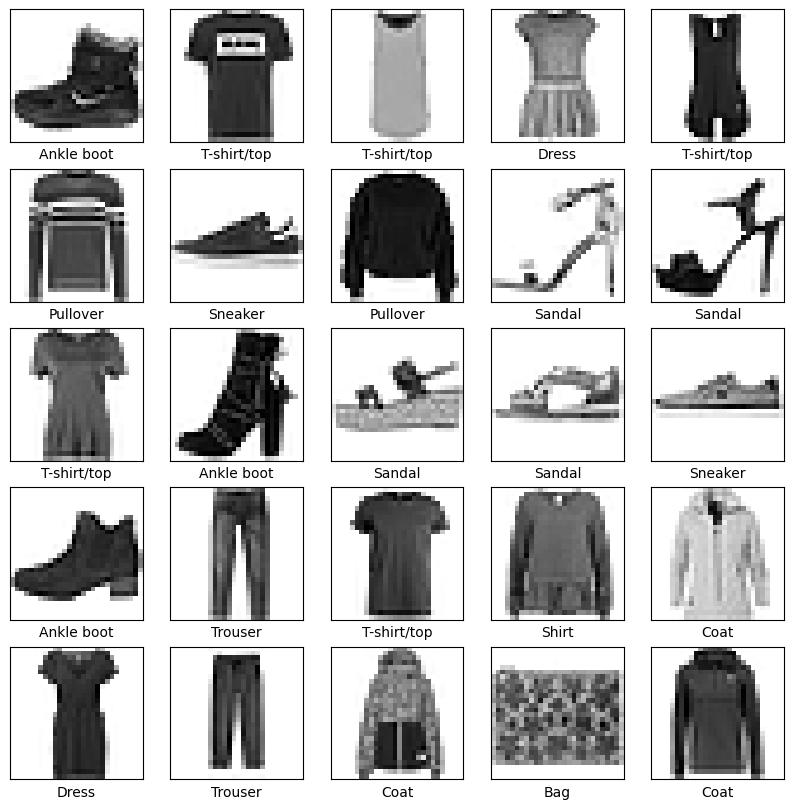

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 5. Feature Scaling

In [6]:
# Min-Max scale to (0, 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
train_images.shape

(60000, 28, 28)

## 8. Label encoding

In [14]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [15]:
print(train_labels.shape)

(60000, 10)


## 7. Defining the Model

In [16]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


In [17]:

model = k.Sequential([
    k.Input(shape=(28, 28)),
    k.layers.Flatten(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10)
])

## 7. Getting the Model Ready For Training

In [18]:
model.compile(loss=k.losses.CategoricalCrossentropy(from_logits=True),
              # optimizer=k.optimizers.SGD(),
              optimizer=k.optimizers.Adam(),
              metrics = [k.metrics.CategoricalAccuracy()])

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history=model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - categorical_accuracy: 0.8256 - loss: 0.4975 - val_categorical_accuracy: 0.8401 - val_loss: 0.4359
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - categorical_accuracy: 0.8646 - loss: 0.3759 - val_categorical_accuracy: 0.8511 - val_loss: 0.4126
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.8771 - loss: 0.3376 - val_categorical_accuracy: 0.8626 - val_loss: 0.3883
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.8850 - loss: 0.3135 - val_categorical_accuracy: 0.8716 - val_loss: 0.3569
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.8924 - loss: 0.2929 - val_categorical_accuracy: 0.8649 - val_loss: 0.3775
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.8961 - loss: 0.2792 - val_categorical_accuracy: 0.8777 - val_loss: 0.3453
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy

<Axes: >

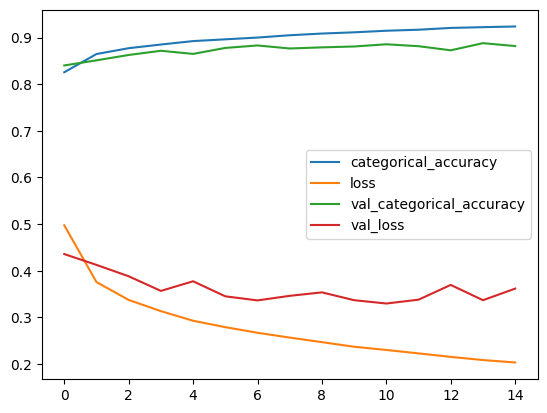

In [21]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df.plot()

In [22]:
model.save('tests\\fashion_mnist.h5')

## 8. Test prediction

In [23]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
tshirt.png --> T-shirt/top (0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
trouser.jpg --> Trouser (1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
dress.jpg --> Dress (3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
ankle boot.jpg --> Ankle boot (9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
bag.jpg --> Bag (8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
sneakers.jpg --> Sneaker (7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
sneakers2.jpg --> Sandal (5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
pullover.jpg --> Shirt (6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
coat2.jpg --> Coat (4)


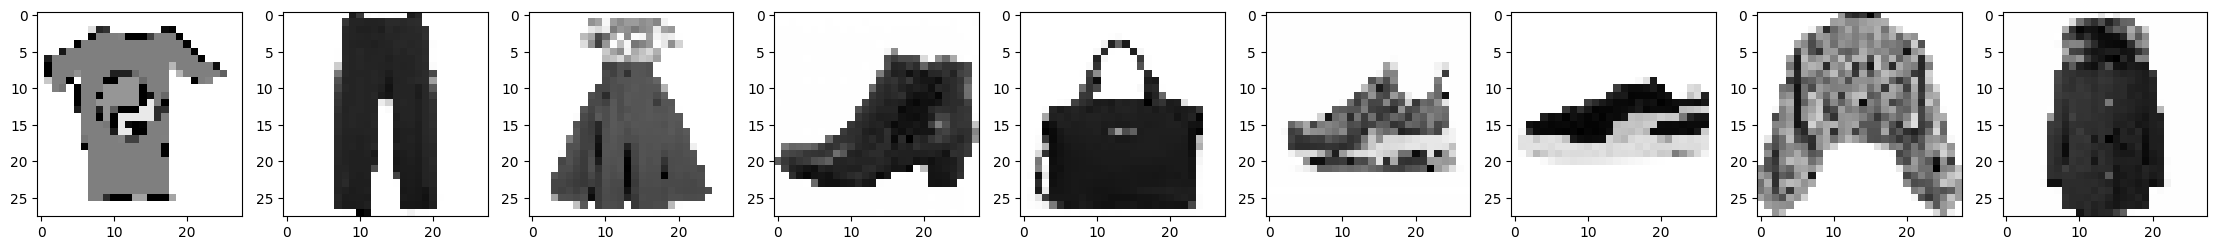

In [38]:
internet_images = ['tshirt.png', 'trouser.jpg', 'dress.jpg', 'ankle boot.jpg', 'bag.jpg', 'sneakers.jpg', 'sneakers2.jpg', 'pullover.jpg', 'coat2.jpg']

figure, ax = plt.subplots(1, len(internet_images), figsize=(28, 28))

for index, image in enumerate(internet_images):

    image_data = cv2.imread('tests/'+image, cv2.IMREAD_GRAYSCALE)
    # resize image to match model input dimensions
    image_data = cv2.resize(image_data, (28, 28))

    ax[index].imshow(image_data, cmap='gray')
    image_data = (255 - image_data) / 255.0
    image_data = np.expand_dims(image_data,0)
    prediction = probability_model.predict(image_data)
    predicted_class_index = np.argmax(prediction)
    prediction = class_names[predicted_class_index]
    print(image, '-->', prediction, f'({predicted_class_index})')